### DEMDOC01 
# Deterministic Optimal Consumption-Investment Model

Utility maximizing agent must decide how much to consume and how much to hold in a riskless asset.

* State
  -     w       stock of wealth
* Control
  -     q       consumption rate
* Parameters
  -     theta   relative risk aversion
  -     r       continuous rate of return on asset
  -     rho     continuous discount rate

## Preliminary tasks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from compecon import ODE

## Initial state and time horizon

In [2]:
winit = 1        # initial capital stock
T     = 50       # time horizon

## SOLUTION & SIMULATION $r>\rho$

### Model parameters

In [3]:
𝜃 = 2.0    # relative risk aversion
r = 0.08   # continuous rate of return on asset
𝜌 = 0.05   # continuous discount rate

In [4]:
# V'>0 iff V''<0 iff sign>0 where

sign = 𝜌 - r*(1-𝜃)

if sign<0:
    print('Invalid Parameters')

### Solve ODE

In [5]:
g = lambda w: ((r-𝜌)/𝜃)*w

problem1 = ODE(g, T, [winit])
problem1.rk4(xnames=[r"$r>\rho$"])

## SOLUTION & SIMULATION $r<\rho$

### Model Parameters

In [6]:
𝜃 = 2.0    # relative risk aversion
r = 0.05   # continuous rate of return on asset
𝜌 = 0.08   # continuous discount rate

In [7]:
# Assume theta>0. Then V'>0 iff V''<0 iff sign>0 where
sign = 𝜌 - r*(1-𝜃)

if sign<0:
    print('Invalid Parameters')

### Solve ODE

In [8]:
g = lambda w: ((r-𝜌)/𝜃)*w

problem2 = ODE(g, T, [winit])
problem2.rk4(xnames=[r"$r<\rho$"])

## PLOT SOLUTIONS

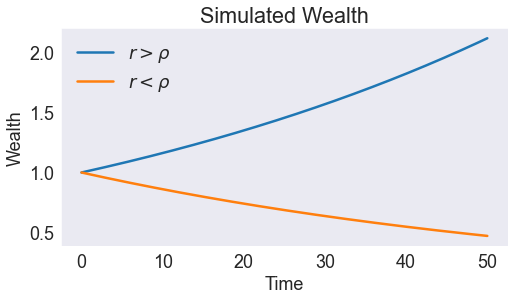

In [9]:
# Plot optimal wealth path
fig, ax= plt.subplots(figsize=[8,4])

wealth = pd.concat([problem1.x, problem2.x], axis=1)
wealth.plot(ax=ax)
ax.set(title='Simulated Wealth',
       xlabel='Time',
       ylabel='Wealth');

%% SAVE FIGURES
printfigures(mfilename)